In [60]:
import torch 
import pandas as pd 
import numpy as np 
import string
import random 
import matplotlib.pyplot as plt 
import json

%matplotlib inline

In [43]:
mua = pd.read_csv("input/coefficients.csv")
mua.head()

,Unnamed: 0,wavelength,oxy,deoxy,water,fat,collagen,mel,musp
0,0,650,1.9706,20.081,0.003200,0.00471,0.07520,283.49,22.209
1,1,651,1.9406,19.794,0.003238,0.00472,0.07405,282.04,22.132
2,2,652,1.9106,19.506,0.003276,0.00467,0.07290,280.61,22.055
3,3,653,1.8806,19.218,0.003314,0.00464,0.07175,279.18,21.978
4,4,654,1.8506,18.930,0.003352,0.00457,0.07060,277.76,21.902


In [18]:
# 參數一狗票，有一些不必要的
x_col = [
    "skin_b",
    "skin_s",
    "skin_w",
    "skin_w",
    "skin_m",
    "skin_musp",
    "skin_bmie",
    "fat_b",
    "fat_s",
    "fat_w",
    "fat_w",
    "fat_m",
    "fat_musp",
    "fat_bmie",
    "muscle_b",
    "muscle_s",
    "muscle_w",
    "muscle_w",
    "muscle_m",
    "muscle_musp",
    "muscle_bmie",
    "ijv_b",
    "ijv_s",
    "ijv_w",
    "ijv_w",
    "ijv_m",
    "ijv_musp",
    "ijv_bmie",
    "cca_b",
    "cca_s",
    "cca_w",
    "cca_w",
    "cca_m",
    "cca_musp",
    "cca_bmie",
    "geo_skin",
    "geo_fat",
    "geo_ijvr",
    "geo_ijvd",
    "geo_ccar",
    "geo_ccad",
    "geo_ijvcca"
]
len(x_col)

42

In [21]:
wl = np.asarray([i for i in range(650, 1001)])
def musp(a, b):
    return a*(wl/500) ** (-b)
    

#### Skin

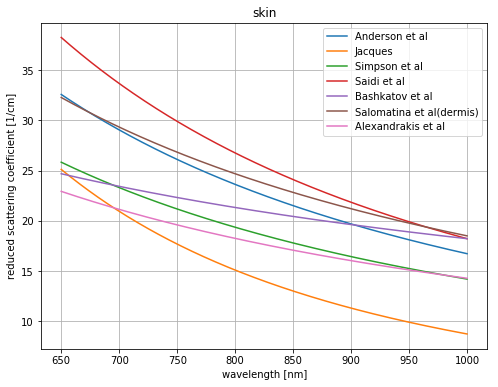

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(wl, musp(48.9, 1.548), label="Anderson et al")
plt.plot(wl, musp(47.8, 2.453), label="Jacques")
plt.plot(wl, musp(37.2, 1.390), label="Simpson et al")
plt.plot(wl, musp(60.1, 1.722), label="Saidi et al")
plt.plot(wl, musp(29.7, 0.705), label="Bashkatov et al")
plt.plot(wl, musp(45.3, 1.292), label="Salomatina et al(dermis)")
# plt.plot(wl, musp(68.7, 1.161), label="Salomatina et al(epidermis)")
plt.plot(wl, musp(30.6, 1.100), label="Alexandrakis et al")

plt.grid()
plt.legend()
plt.title("skin")
plt.xlabel("wavelength [nm]")
plt.ylabel("reduced scattering coefficient [1/cm]")
plt.show()

#### Muscle

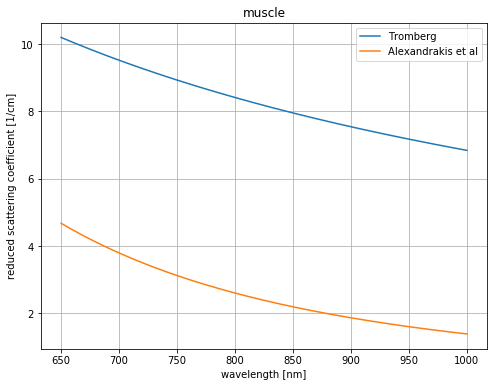

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(wl, musp(13.0, 0.926), label="Tromberg")
plt.plot(wl, musp(9.80, 2.820), label="Alexandrakis et al")


plt.grid()
plt.legend()
plt.title("muscle")
plt.xlabel("wavelength [nm]")
plt.ylabel("reduced scattering coefficient [1/cm]")
plt.show()

#### Fat

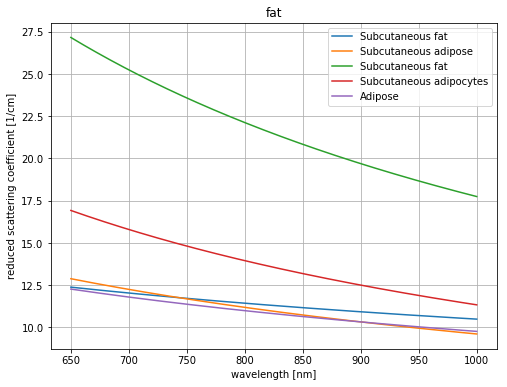

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(wl, musp(13.7, 0.385), label="Subcutaneous fat")
# plt.plot(wl, musp(10.6, 0.520), label="Adipose breast")
plt.plot(wl, musp(15.4, 0.680), label="Subcutaneous adipose")
plt.plot(wl, musp(35.2, 0.988), label="Subcutaneous fat")
plt.plot(wl, musp(21.6, 0.930), label="Subcutaneous adipocytes")
plt.plot(wl, musp(14.1, 0.530), label="Adipose")

plt.grid()
plt.legend()
plt.title("fat")
plt.xlabel("wavelength [nm]")
plt.ylabel("reduced scattering coefficient [1/cm]")
plt.show()

#### Playground

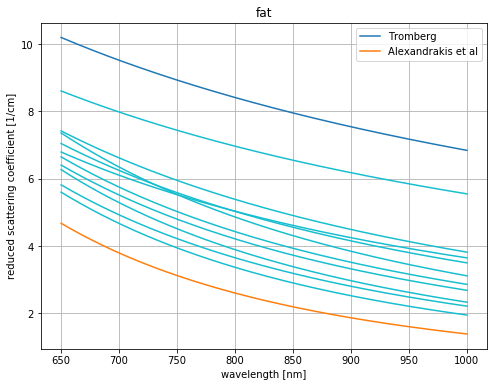

In [41]:
plt.figure(figsize=(8, 6))
# plt.plot(wl, musp(13.7, 0.385), label="Subcutaneous fat")
# plt.plot(wl, musp(10.6, 0.520), label="Adipose breast")
# plt.plot(wl, musp(15.4, 0.680), label="Subcutaneous adipose")
# plt.plot(wl, musp(35.2, 0.988), label="Subcutaneous fat")
# plt.plot(wl, musp(21.6, 0.930), label="Subcutaneous adipocytes")
# plt.plot(wl, musp(14.1, 0.530), label="Adipose")
plt.plot(wl, musp(13.0, 0.926), label="Tromberg")
plt.plot(wl, musp(9.80, 2.820), label="Alexandrakis et al")

for i in range(10):
#     plt.plot(wl, musp(random.uniform(10.6, 35.2), random.uniform(0.385, 0.988)), color="C9")
    plt.plot(wl, musp(random.uniform(9.8, 13.0), random.uniform(0.926, 2.82)), color="C9")
plt.grid()
plt.legend()
plt.title("fat")
plt.xlabel("wavelength [nm]")
plt.ylabel("reduced scattering coefficient [1/cm]")
plt.show()

In [ ]:
def mua_(b, s, w, f, m):
    return b * (mua["oxy"]*s + mua["deoxy"]*(1-s)) + w * mua["water"] + m * mua["mel"]

In [71]:
# 1/cm
x_range = {
#     "skin_b": (0.0012, 0.0041),
#     "skin_s": (0.985, 1.0),
#     "skin_w": (16.6, 26.1),
#     "skin_f": (18.7, 27.7),
#     "skin_m": (0.87, 1.65),
    "skin_musp": (29.7, 48.9),
    "skin_bmie": (0.705, 2.453),
#     "fat_f": (),
    "fat_musp": (13.7, 35.8),
    "fat_bmie": (0.385, 0.988),
#     "muscle_b": (0.005, 0.050),
#     "muscle_s": (0.5, 0.9),
#     "muscle_w": (0.5, 0.9),
    "muscle_musp": (9.8, 13.0),
    "muscle_bmie": (0.926, 2.82),
#     "ijv_s": (0.0, 1.0),
    "ijv_musp": (10, 20),
#     "cca_s": (0.0, 1.0),
    "cca_musp": (10, 20),
# mm
    "geo_skin": (0.5, 1.5),
    "geo_fat": (0.5, 1.5),
    "geo_ijvr": (2.5, 10.5),
    "geo_ijvd": (2, 16),
    "geo_ccar": (2.5, 4.5),
    "geo_ccad": (5, 26),
    "geo_ijvcca": (5, 10)
}

In [72]:
len(x_range)

15

In [77]:
x_col = [
    "idx",
#     "skin_b",
#     "skin_s",
#     "skin_w",
#     "skin_f",
#     "skin_m",
    "skin_musp",
    "skin_bmie",
#     "fat_b",
#     "fat_s",
#     "fat_w",
#     "fat_f",
#     "fat_m",
    "fat_musp",
    "fat_bmie",
#     "muscle_b",
#     "muscle_s",
#     "muscle_w",
#     "muscle_f",
#     "muscle_m",
    "muscle_musp",
    "muscle_bmie",
#     "ijv_b",
#     "ijv_s",
#     "ijv_w",
#     "ijv_f",
#     "ijv_m",
    "ijv_musp",
#     "ijv_bmie",
#     "cca_b",
#     "cca_s",
#     "cca_w",
#     "cca_f",
#     "cca_m",
    "cca_musp",
#     "cca_bmie",
    "geo_skin",
    "geo_fat",
    "geo_ijvr",
    "geo_ijvd",
    "geo_ccar",
    "geo_ccad",
    "geo_ijvcca"
]

In [78]:
len(x_col)

16

In [79]:
def get_idx(n=10):
    assert n > 1, "n should be greater than 1"
    first = random.choice(string.ascii_letters)
    rest = "".join(random.sample(string.ascii_letters + string.digits, n-1))
    return first + rest

In [80]:
get_idx()

'rOlnB3IzaF'

In [108]:
x = {i: [] for i in x_col}
for i in range(100):
    for xx in x_col[:-7]:
        if xx == "idx":
            x[xx] += [get_idx()]            
        else:
            x[xx] += [random.uniform(x_range[xx][0], x_range[xx][1])]
    ["geo_skin", "geo_fat", "geo_ijvr", "geo_ijvd", "geo_ccar", "geo_ccad", "geo_ijvcca"]          
    x["geo_skin"] += [random.uniform(x_range["geo_skin"][0], x_range["geo_skin"][1])]
    x["geo_fat"] += [random.uniform(x_range["geo_fat"][0], x_range["geo_fat"][1])]
    x["geo_ijvd"] += [random.uniform(x_range["geo_ijvd"][0], x_range["geo_ijvd"][1])]
    x["geo_ijvr"] += [random.uniform(x_range["geo_ijvr"][0], x_range["geo_ijvr"][1])]
    while x["geo_skin"][-1] + x["geo_fat"][-1] > x["geo_ijvd"][-1] - x["geo_ijvr"][-1]:
        x["geo_ijvd"][-1] = random.uniform(x_range["geo_ijvd"][0], x_range["geo_ijvd"][1])
        x["geo_ijvr"][-1] = random.uniform(x_range["geo_ijvr"][0], x_range["geo_ijvr"][1])
    
    x["geo_ccad"] += [random.uniform(x_range["geo_ccad"][0], x_range["geo_ccad"][1])]
    x["geo_ccar"] += [random.uniform(x_range["geo_ccar"][0], x_range["geo_ccar"][1])]
    x["geo_ijvcca"] += [random.uniform(x_range["geo_ijvcca"][0], x_range["geo_ijvcca"][1])]
    while (x["geo_ccad"][-1] - x["geo_ijvd"][-1])**2 + (x["geo_ijvcca"][-1])**2 <  (x["geo_ccar"][-1] + x["geo_ijvr"][-1])**2:
        x["geo_ccad"][-1] = random.uniform(x_range["geo_ccad"][0], x_range["geo_ccad"][1])
        x["geo_ccar"][-1] = random.uniform(x_range["geo_ccar"][0], x_range["geo_ccar"][1])
        x["geo_ijvcca"][-1] = random.uniform(x_range["geo_ijvcca"][0], x_range["geo_ijvcca"][1])
    
    
df = pd.DataFrame(x)

In [109]:
df.to_csv("train/data_list.csv", index=None)

In [110]:
import json 
with open("train/input/template.json") as f:
    inp = json.load(f)

inp

{'skin': {'n': 1.4, 'g': 0.94, 'muspx': 5.17, 'bmie': 1.0},
 'fat': {'n': 1.4, 'g': 0.94, 'muspx': 5.17, 'bmie': 1.0},
 'muscle': {'n': 1.4, 'g': 0.94, 'muspx': 5.17, 'bmie': 1.0},
 'IJV': {'n': 1.4, 'g': 0.94, 'muspx': 10.0, 'bmie': 1.0},
 'CCA': {'n': 1.4, 'g': 0.94, 'muspx': 10.0, 'bmie': 1.0},
 'geometry': {'skin_thickness': 1.75,
  'fat_thickness': 1,
  'ijv_radius': 5.25,
  'ijv_depth': 14.25,
  'cca_radius': 3.75,
  'cca_depth': 22,
  'ijv_cca_distance': 8.25},
 'boundary': {'x_size': 150, 'y_size': 150, 'z_size': 200}}

In [111]:
for i in range(len(df)):
    inp["idx"] = df["idx"][i]
    inp["skin"]["muspx"] = df["skin_musp"][i]
    inp["skin"]["bmie"] = df["skin_bmie"][i]

    inp["fat"]["muspx"] = df["fat_musp"][i]
    inp["fat"]["bmie"] = df["fat_bmie"][i]

    inp["muscle"]["muspx"] = df["muscle_musp"][i]
    inp["muscle"]["bmie"] = df["muscle_bmie"][i]

    inp["IJV"]["muspx"] = df["ijv_musp"][i]
    inp["IJV"]["bmie"] = 1.0

    inp["CCA"]["muspx"] = df["cca_musp"][i]
    inp["CCA"]["bmie"] = 1.0

    inp["geometry"]["skin_thickness"] = df["geo_skin"][i]
    inp["geometry"]["fat_thickness"] = df["geo_fat"][i]
    inp["geometry"]["ijv_radius"] = df["geo_ijvr"][i]
    inp["geometry"]["ijv_depth"] = df["geo_ijvd"][i]
    inp["geometry"]["cca_radius"] = df["geo_ccar"][i]
    inp["geometry"]["cca_depth"] = df["geo_ccad"][i]
    inp["geometry"]["ijv_cca_distance"] = df["geo_ijvcca"][i]
    inp["boundary"]["x_size"] = 150
    inp["boundary"]["y_size"] = 150
    inp["boundary"]["z_size"] = 200
    

    with open("train/input/" + df["idx"][i] + ".json", "w+") as f:
        json.dump(inp, f, indent=4)


In [95]:
for i in df["idx"]:
    print(i)

maYSpJUXZj
GjQdkYsJDB
EUlRq0vrxB
rlOfi1rHSy
AER7bPunwL
AqFvlzfm64
m8IhB9wjgR
u23J054rIi
FY8Hg4lUzS
q7XxsK36hH
VK8PHm5Cq4
vrcUw8klvG
fOlYqxGXfi
qtC45awZHz
NcNBt4FOIy
z6miOwVh7W
fFre3vK7ot
McpOo4t2Fs
ftr0eSA8xf
pe1RfLUYSh
tdprbNSxXJ
NhPe9OcTS3
Cx51TSlB2Y
YUDCiNO0cA
lTvEGIz6cN
QhUjlTNSX4
ZMK7gPzeGR
rKB6RCp5nr
WU9ahi8eql
QLoX5wZh3x
uIcRqMWzeK
Gz2Tm4Lxdv
q4B0yQZYwd
Cx8bzYSO27
FUBO2ndupV
ZYsczVjp0y
QnChwNkBOj
tPRHoLDEFg
LNxDIwqeo5
yOrWcACzH7
qojAQGTmXW
CyHThSPY8o
a4xaykLZuz
YW9un1LqY5
ROzAQU7Svm
FMwPm7eFft
WfKXeLlkiW
UOzYiHXg6J
kxAq1QNg0C
qv1L04IdAj
p09rMJtO6H
s04JlCkxjQ
etYpqKaNVS
dLn31YGmCg
KxVfovz9E7
L0JNC4gyFP
oe53NjIZKz
B7f4aMmNyd
yvFGrgbj1n
lwZlSYPc6z
RCSo9yNjqc
FcSyd75qDB
vkaF5tY17R
yK8Sd5HcMr
YV5yJEpOdL
C1yVafJrdm
z0vCJmpBcO
zYtSQ4gXnf
sWI8FHgkLP
otyazXC6T0
t5Lz6VfSvc
uEISwAfWaO
avYehWafkK
mApgDEdhXY
xwc8Np7SDi
ssaY6HJOM5
t0aIPOKNHg
IG5EWD7RwF
arcSiKBRjX
NVfpPbQGEw
kY3VNCx1Qi
F6vhNspJtT
giSKP0cupW
YVnPrSO1i8
A6FQzXi8TJ
b9kmlW5x1u
rUWaqI72Mv
yXqAmgzwbI
VQNoXt7TP1
jDgY0GWI7z
rnhvzYPDxe

In [99]:
fib = pd.read_csv("input/fiber_20190511.csv")
for i, j in fib.values[:]:
    print(i, j)

3.1 0.58
4.0 0.58
4.4 0.58
5.3 0.58
6.3 0.58
20.0 1.645
24.0 1.645
28.0 1.645
